In this part you will attemp to generate an image which is closest to a target image given.

First we will load the image from a file:

In [12]:
import numpy as np
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

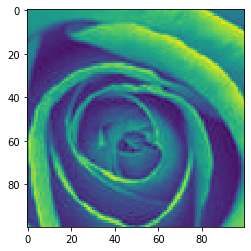

In [7]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [8]:
target = img[100:200,200:300,0]

Let's plot a random picture

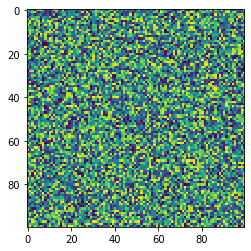

In [51]:
new_population = np.random.randint(low=0, high=255, size=10000)
new_img = new_population.reshape(target.shape[0], target.shape[1])
imgplot = plt.imshow(new_img)

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don't worry if it's still noisy... FYI: GA are not the best solution for these types of problems ;) You can use these blog posts to give you ideas: https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [9]:
def fitness_function(data, pop):
    fitness = []
    for gene in pop:
        error = np.sum((data - gene)**2)
        fitness.append(1 / error)
    return fitness

def mutation(offspring_recombination):
    mutation_size = offspring_recombination.shape[1] * mutation_rate // 100
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.uniform(-10, 10, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1], mutation_size)
        offspring_recombination[idx][random_index] = (offspring_recombination[idx][random_index] + offspring_recombination[idx][random_index] * random_value // 100) % 255
    return offspring_recombination


def get_score(data, new_population):
    return 1 / np.max(fitness_function(data, new_population))

This definition of biased_selection keeps an adjustable percentage of the best chromosomes. This is to avoid degeneration. Then uses a binomial distribution based on fitness score to keep parents. I didn't show the result to simplify the notebook but it didn't improve that much

In [20]:
def biased_selection(pop, fitness, num_parents):
    prob = np.linspace(0.0, 1.0, pop.shape[0])
    keep_elite_nb = pop.shape[0] * keep_elite // 100
    prob[-keep_elite_nb:] = 1
    mask = np.random.binomial(1, prob,  pop.shape[0])
    parent = pop[np.argsort(fitness)[mask==1], :]
    if parent.shape[0] > num_parents:
        return parent[-num_parents:]
    return parent

In [25]:
def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0] 
        parent2_idx = (k + 1) % parents.shape[0]
        dominant_gene_mat = np.random.choice([True, False], formula_degree)
        offspring[k][dominant_gene_mat] = parents[parent1_idx][dominant_gene_mat]
        offspring[k][~dominant_gene_mat] = parents[parent2_idx][~dominant_gene_mat]        
    return offspring

We stop when the fitness is close enough to what we want (sometimes I got good result quickly sometime it takes more generations)

In [21]:
# Loop calling the main functions
def run_all(new_population, modulo_rate=10):
    score = get_score(data, new_population)
    generation = 0
    while (score > threshold):
        generation += 1
        fitness = fitness_function(data, new_population)
        parents = biased_selection(new_population, fitness, number_of_parents)
        offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
        offspring_mutation = mutation(offspring_recombination)
        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:, :] = offspring_mutation
        score = get_score(data, new_population)
        if generation % modulo_rate == 0:
            print(f"generation:{generation}, score:{score}")
    fitness = fitness_function(data, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    print("Generation:", generation, "score:", score, "Our solution: ", new_population[best_match_idx, :])
    return new_population[best_match_idx, :]

generation:1000, score:27400713.999999996
Generation: 1718 score: 20633489.0 Our solution:  [[[143  66 101 ... 142 206 111]]]


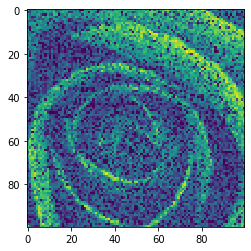

In [27]:

threshold = 20634056 #score expected to stop, the smaller the better
# threshold = 13543210 #this is a good score but it takes time
modulo_rate = 1000 # parameter to print logs at modulo_rate iteration 
mutation_rate = 1 # in % 

number_of_solutions = 500
number_of_parents = 250
keep_elite = 5

data = target.reshape(-1, target.shape[0] * target.shape[1])
formula_degree = data.shape[1]
population_size = (number_of_solutions, formula_degree)
new_population = np.random.randint(low=0, high=255, size=population_size)
pop = run_all(new_population, modulo_rate)
new_img = pop[0][0].reshape(target.shape[0], target.shape[1])
imgplot = plt.imshow(new_img)